In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below**

In [ ]:
# Aayush Bisht

# Iris dataset

We will use the Iris dataset (from Lab 1) again.

In [2]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

In [3]:
X_iris, y_iris = iris_dataset.data, iris_dataset.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [4]:
from matplotlib.colors import ListedColormap
# colormap = ListedColormap(['blue', 'red', 'green'])
colormap = ListedColormap(['red', 'green', 'blue'])

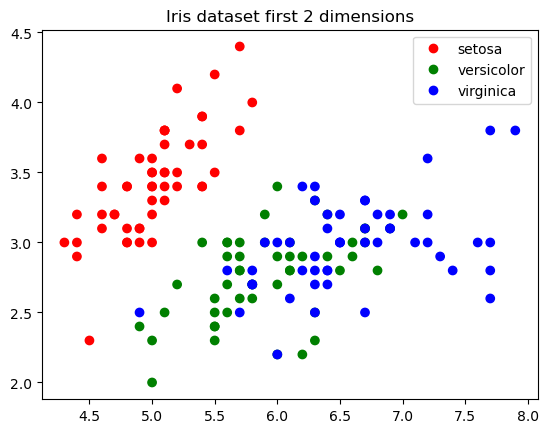

In [5]:
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.title("Iris dataset first 2 dimensions")
plt.show()

# 2D GMM

Let us work only on the first two dimensions of the dataset for now.

In [6]:
# We keep only the first 2 dimensions of X_iris
X_iris_2d = X_iris[:, :2]

## Basic GMM

**Fit a Gaussian Mixture Model (gmm) on the first 2 dimensions of the dataset**

No need to re-implement GMM yourself, use scikit-learn.

In [7]:
from sklearn.mixture import GaussianMixture
gmm =GaussianMixture(n_components =3, random_state =0).fit(X_iris_2d)

C:\Users\usbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Display the mean vector and covariance matrix of each cluster**

In [8]:
print("Mean of GMM :",gmm.means_)
covariances = gmm.covariances_
print("Covrainces of each cluste is",covariances)

Mean of GMM : [[5.9009976  2.74387546]
 [6.68055626 3.02849627]
 [5.01507898 3.4514463 ]]
Covrainces of each cluste is [[[0.27671149 0.08897036]
  [0.08897036 0.09389206]]

 [[0.36153508 0.05159664]
  [0.05159664 0.08927917]]

 [[0.11944714 0.08835648]
  [0.08835648 0.11893388]]]


Now let us try to visualize the result.

We will start by looking at which areas corresponds to which cluster.
The generic idea is: we can compute the likelihood that a point $\mathbf{x}$ belongs to cluster $k$: we know the mean $\boldsymbol{\mu}_k$ and the covariance matrix $\boldsymbol{\Sigma}_k$ of cluster $k$, so we can estimate the corresponding probability density function (pdf) $p(\mathbf{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) = \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$, with
$$
\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) = \frac{1}{(2\pi)^{D/2}|\boldsymbol{\Sigma}_k|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_k)^\top\boldsymbol{\Sigma}_k^{-1}(\mathbf{x}-\boldsymbol{\mu}_k)\right)
$$

Doing this for every cluster, we can then compute the probability that $\mathbf{x}$ belongs to cluster $k$, or *responsability* $\gamma_k(\mathbf{x})$, as
$$
\gamma_k(\mathbf{x}) = \frac{\pi_k\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum_{j=1}^K \pi_j\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)}
$$

The cluster with the highest responsability $\underset{k}{\text{argmax}}~ \gamma_k(\mathbf{x})$ is the cluster to which $\mathbf{x}$ can be assigned.

Good news: this can be done using the "predict" method from scikit-learn.

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

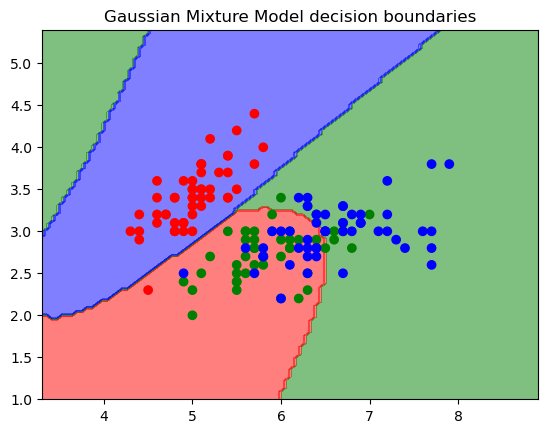

In [10]:
# Assuming we fitted a Gaussian Mixture Model called gmm with a predict method,
# plot which area is assigned to which cluster
disp = DecisionBoundaryDisplay.from_estimator(
    gmm, X_iris_2d,
    response_method="predict",
    # cmap=plt.cm.coolwarm,
    cmap=colormap,
    alpha=0.5
)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, cmap=colormap)
plt.title("Gaussian Mixture Model decision boundaries")
plt.show()

Notice that although the areas predicted for each cluster seem reasonable, the colors do not necessarily match: this is because GMM is an <ins>**unsupervised**</ins> model: we did not provide any label to the model, so it has no way of knowing which cluster corresponds to which label.

**Do the same with K-Means, and compare result. What is the most striking difference?**

C:\Users\usbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
 [[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.428     ]]
Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


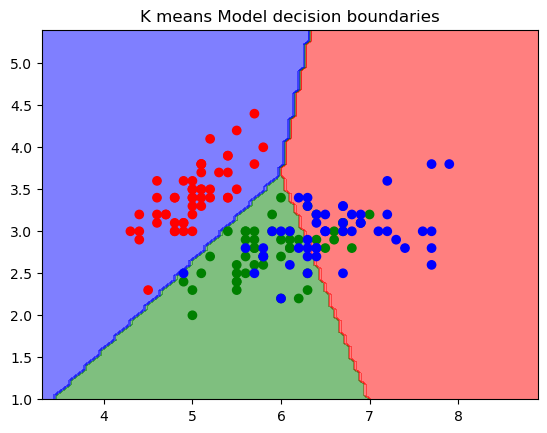

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =3, random_state =42).fit(X_iris_2d)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster Centers:\n", centers)
print("Labels:", labels)
disp = DecisionBoundaryDisplay.from_estimator(
    kmeans,
    X_iris_2d,
    response_method="predict",
    cmap=colormap,
    alpha=0.5
)

plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, cmap=colormap)
plt.title("K means Model decision boundaries")
plt.show()

## Mixture's likelihood

Another cool feature of GMM: we have "soft" cluster assignments, which provide an estimate of how certain we are that a point belongs to a cluster.

Let us visualize the probabilities that each point belongs to each cluster with colors.

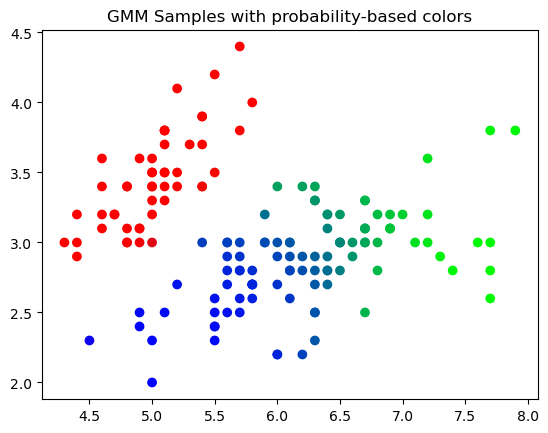

In [12]:
# Get probabilities for each cluster
N, D = X_iris_2d.shape
probs = gmm.predict_proba(X_iris_2d)

# Create RGB colors based on probabilities
# Based on the color displayed on my fit,
# let's use red for cluster 2, green for cluster 1, and for blue cluster 0 to match the initial colors.
# Which color corresponds to which cluster may be easily changed depending on which of your cluster corresponds to which initial color.
colors = np.zeros((N, 3))
colors[:, 0] = probs[:, 2]  # Red channel (cluster 2)
colors[:, 1] = probs[:, 1]  # Green channel (cluster 1)
colors[:, 2] = probs[:, 0]  # Blue channel (cluster 0)

# Plot the first two dimensions with the mixed colors
# plt.figure(figsize=(4,4))
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=colors)
plt.title("GMM Samples with probability-based colors")
plt.show()

Assuming we didn't have access to labels, now we can see that for points in bright red, we are fairly certain that they belong to cluster 2. For some points in green and blue, respectively the leftmost and rightmost points, we are fairly certain they belong to clusters 1 and 0. And for other points, those in the center, we are unsure whether they belong to cluster 1 (green) or 0 (blue).

Let us try to get a better understanding of what is going on. Scikit-learn lets use estimate the (log)likelihood of a point with respect to the distribution of the mixture model: points with high likelihood "fit" the model quite well and are likely to come from this distribution, while points with low likelihood do not seem to fit the data and may be outliers.

**Compute the (log)likelihood with respect to the distribution of the GMM for all points in the dataset**

Hint: similarly to the cluster assigments, you do not need to write the equations yourself: there is a method that does this.

In [13]:
log_likelihoods = gmm.score_samples(X_iris_2d)
total_log_likelihood = log_likelihoods.sum()
average_log_likelihood = gmm.score(X_iris_2d)

print("Log-likelihood for each sample:\n", log_likelihoods[:5])  # first 5 values
print("Total Log-Likelihood:", total_log_likelihood)
print("Average Log-Likelihood per sample:", average_log_likelihood)

Log-likelihood for each sample:
 [-0.46903233 -1.69961423 -0.85530918 -1.17568138 -0.67653417]
Total Log-Likelihood: -224.70110404305075
Average Log-Likelihood per sample: -1.498007360287005


**Which 10 points can be considered to be the best representatives of this dataset w.r.t. our model? Which 10 are the least representatives?**

Now, we would like to have more information about which areas correspond to high likelihood versus low likelihood according to the mixture model. For that, we can compute the likelihood associated with each point in our 2D space.

This is very similar to what we did in Lab 4 to obtain probability heatmaps: for a given classifer, we computed the estimated probability associated with each pixel (or with each very small area) of our 2D space. But there is no function like DecisionBoundaryDisplay.from_estimator for this specific use case*, so we will have to do this a bit more manually.

**(as of September 2024 and to the best of my knowledge)*

The function below will take as input a predictor.
The predictor itself takes a 2D input and outputs a value (for example a likelihood, a probability...)
This value is then computed for "every" point in the 2D rectangle from (xmin,ymin) to (xmax,ymax), and the result is returned as an array of shape (50,50), along with the 50x50 corresponding x and y coordinates.

In [37]:
from typing import Callable

def map_space(predictor: Callable[[np.ndarray], np.ndarray], xmin=4, xmax=8, ymin=1, ymax=5) -> np.ndarray:
    """
    Apply a function f to all points in space in the indicated area

    Args:
        predictor: function taking 2D features (as an numpy array of shape (N,2)) as input,
                   and returning 1 output per input (as an numpy array of shape (N,))
        xmin, xmax etc: define the area to be considered (by default, area of interest for first 2 dimensions of Iris dataset)

    Return:
        XX: all x coordinates, as an array of shape (50,50)
        YY: all y coordinates, as an array of shape (50,50)
        ZZ: predicted values from all the x y, as an array of shape (50,50)
    """
    N_points = 50
    x_range = np.linspace(xmin, xmax, num=N_points) # 50 points from ymin to ymax, shape (50,)
    y_range = np.linspace(ymin, ymax, num=N_points) # 50 points from ymin to ymax, shape (50,)
    XX, YY = np.meshgrid(x_range, y_range) # grids of all x coordinates with all y coordinates, shape (50,50)
    grid = np.array([XX.ravel(), YY.ravel()]).T # all 50 * 50 points arranged in shape (2500,2)
    Z = predictor(grid) # apply f to all point to get 1 value for each point, shape (2500,)
    ZZ = Z.reshape(XX.shape) # rearrange points in a 2D, shape (50,50)
    return XX, YY, ZZ

For instance, here we compute the log-likelihood for every point in the rectangle defined by xmin xmax etc:

In [38]:
# Get the generic log_likelihood
xx, yy, zz = map_space(gmm.score_samples)

These values can then be used to e.g. plot decision contour

In [39]:
from matplotlib.colors import LogNorm, SymLogNorm

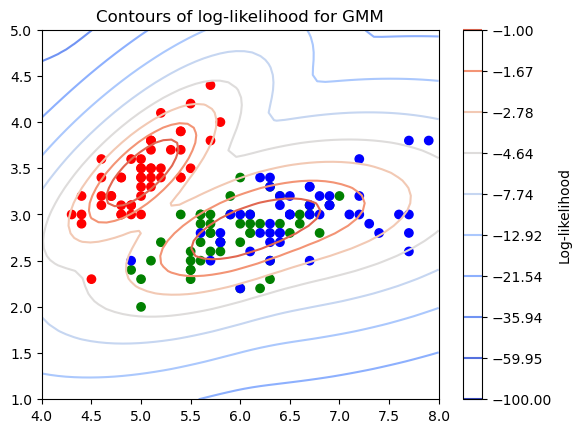

In [40]:
# plt.figure(figsize=(4,4))
# Show contour plot
contour = plt.contour(
    xx, yy, zz,
    # line below is not necessary, but is added so that contours shown better match our scale
    levels=-np.logspace(0,2,10)[::-1], norm=SymLogNorm(linthresh=3, linscale=1, vmin=-100, vmax=0),
    cmap=plt.cm.coolwarm
)
# Add points
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, cmap=colormap)
# Add legend, title etc
cbar = plt.colorbar(contour)
cbar.set_label('Log-likelihood')# Label for the color bar
plt.title("Contours of log-likelihood for GMM")
plt.show()

Two of the clusters (green and blue) are quite close to each other: their contour are hard to distinguish if we only look at the total likelihoods of the GMM.

## Cluster's likelihood

We would rather like contours corresponding to the likelihoods of individual clusters.. Unfortunately, there is no easy way to do that with scikit-learn: Scikit-learn implementation only provides the likelihoods/contours for the mixture of gaussians, but not for individual clusters/gaussians. We will need to estimate that ourselves.

**Write a function that takes as inputs a set of points X, the mean mu of a (multivariate) gaussian and the corresponding covariance matrix sigma, and outputs the likelihoods for all points.**

In [15]:
import numpy as np

def log_likelihood(X: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
    """
    Compute the log-likelihood of samples under a multivariate Gaussian.
    
    Args:
        X: samples for which to compute log-likelihood, shape (N, D)
        mu: mean of Gaussian, shape (D,)
        Sigma: covariance matrix of Gaussian, shape (D, D)

    Return:
        log_likelihoods: shape (N,)
    """

    N, D = X.shape
    
    # Step 1: Compute inverse of Sigma
    Sigma_inv = np.linalg.inv(Sigma)

    # Step 2: Compute determinant of Sigma
    det_Sigma = np.linalg.det(Sigma)

    # Step 3: Compute diff = X - mu (broadcasting works)
    diff = X - mu  # (N, D)

    # Step 4: Compute Mahalanobis distance for each sample:
    # (x - mu)^T Σ^{-1} (x - mu)
    # Vectorized form:
    mahalanobis = np.sum(diff @ Sigma_inv * diff, axis=1)

    # Step 5: Compute the log normalizing constant
    log_norm = D * np.log(2 * np.pi) + np.log(det_Sigma)

    # Step 6: Compute log-likelihood
    log_likelihoods = -0.5 * (log_norm + mahalanobis)

    return log_likelihoods

    

**Use this to plot the (log)likelihood contours for cluster 0.**

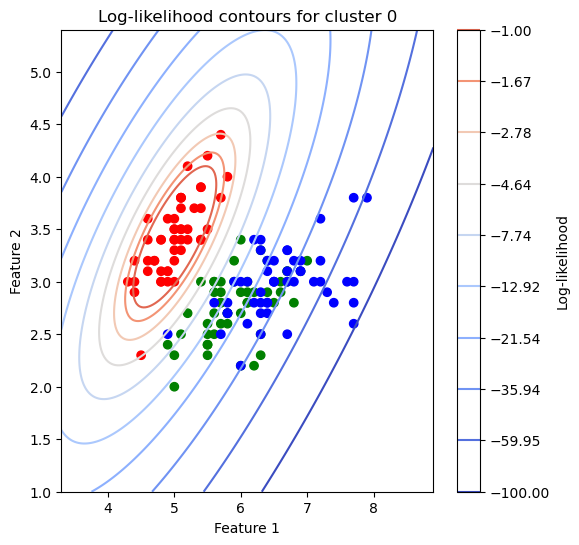

In [20]:
import numpy as np
from matplotlib.colors import SymLogNorm

# Select points belonging to cluster 0
cluster_0_points = X_iris_2d[y_iris == 0]

# Calculate mean vector (mu0)
mu0 = np.mean(cluster_0_points, axis=0)

# Calculate covariance matrix (Sigma0)
Sigma0 = np.cov(cluster_0_points, rowvar=False)

# ---- Generate grid over feature space ----
x_min, x_max = X_iris_2d[:, 0].min() - 1, X_iris_2d[:, 0].max() + 1
y_min, y_max = X_iris_2d[:, 1].min() - 1, X_iris_2d[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]

# ---- Compute log-likelihood on grid for cluster 0 ----
zz = log_likelihood(grid, mu0, Sigma0)
zz = zz.reshape(xx.shape)

# ---- Plot contour ----
plt.figure(figsize=(6, 6))

contour = plt.contour(
    xx, yy, zz,
    levels=-np.logspace(0, 2, 10)[::-1],
    norm=SymLogNorm(linthresh=3, linscale=1, vmin=-100, vmax=0),
    cmap=plt.cm.coolwarm
)

# ---- Plot Iris points ----
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, cmap=colormap)

# ---- Add colorbar ----
cbar = plt.colorbar(contour)
cbar.set_label("Log-likelihood")

plt.title("Log-likelihood contours for cluster 0")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Now do the same thing for all 3 clusters**

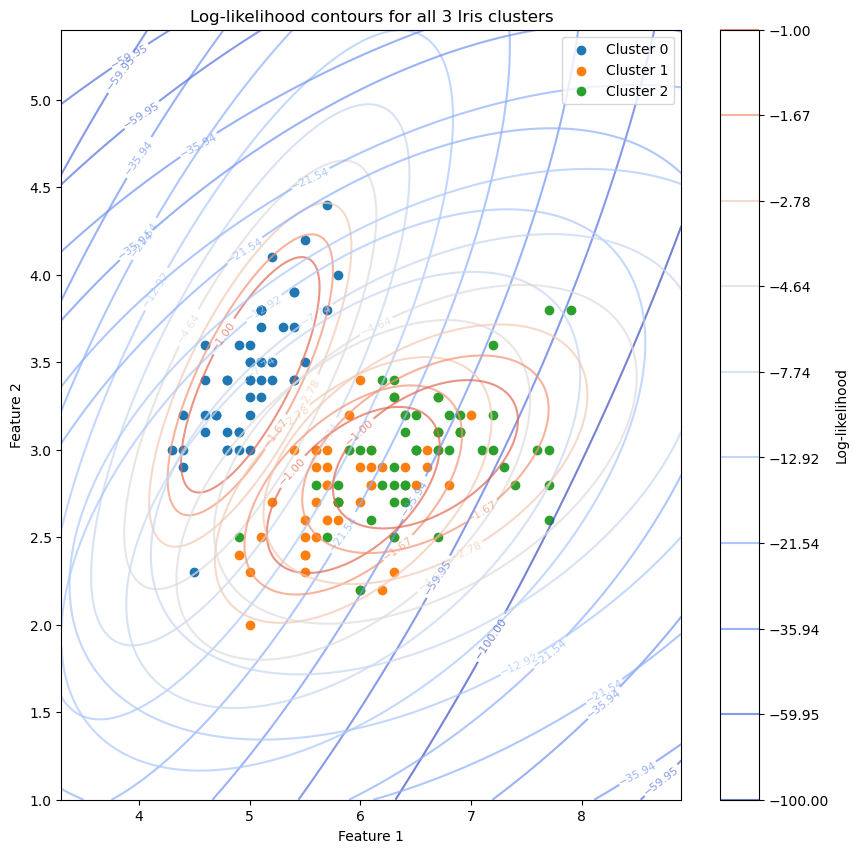

In [21]:
# Calculate mean and covariance for each cluster
mus = []
Sigmas = []

for cluster in np.unique(y_iris):
    X_cluster = X_iris_2d[y_iris == cluster]
    mu = X_cluster.mean(axis=0)
    Sigma = np.cov(X_cluster, rowvar=False)
    mus.append(mu)
    Sigmas.append(Sigma)

# Create a grid to evaluate log-likelihoods
x_min, x_max = X_iris_2d[:, 0].min() - 1, X_iris_2d[:, 0].max() + 1
y_min, y_max = X_iris_2d[:, 1].min() - 1, X_iris_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Plot contours for all clusters
plt.figure(figsize=(10, 10))
colormap = plt.cm.viridis

for i, (mu, Sigma) in enumerate(zip(mus, Sigmas)):
    zz = log_likelihood(grid, mu, Sigma)
    zz = zz.reshape(xx.shape)
    
    contour = plt.contour(
        xx, yy, zz,
        levels=-np.logspace(0, 2, 10)[::-1],
        norm=SymLogNorm(linthresh=3, linscale=1, vmin=-100, vmax=0),
        cmap=plt.cm.coolwarm,
        alpha=0.7
    )
    plt.clabel(contour, inline=True, fontsize=8)
    plt.scatter(X_iris_2d[y_iris == i, 0], X_iris_2d[y_iris == i, 1], label=f"Cluster {i}")

plt.colorbar(contour, label="Log-likelihood")
plt.title("Log-likelihood contours for all 3 Iris clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Recall that the log likelihood of the full Gaussian mixture model can be obtained by a weighted combination of the likelihoods of each individual cluster/Gaussian:

$$
\log p(\mathbf{X}|\boldsymbol{\pi}, \mathbf{M}, \boldsymbol{S}) = \sum_{n=1}^N \log \left(\sum_{k=1}^K \pi_k\mathcal{N}(\mathbf{x}_n|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)\right) 
$$

**Compute the (log) likelihood for the full GMM model for every point in the dataset using the log likelihood of the each cluster. Check that this corresponds to the (log) likelihood returned by scikit-learn**

In [22]:
# Fit GMM with 3 components
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_iris_2d)

# Extract parameters
weights = gmm.weights_        # shape (3,)
means = gmm.means_            # shape (3, 2)
covariances = gmm.covariances_ # shape (3, 2, 2)

# Define log likelihood function (same as before)
def log_likelihood(X, mu, Sigma):
    D = mu.shape[0]
    sigma_inv = np.linalg.inv(Sigma)
    det_sigma = np.linalg.det(Sigma)
    diff = X - mu
    exponent = np.einsum('ij,jk,ik->i', diff, sigma_inv, diff)
    norm_const = 1 / np.sqrt((2 * np.pi) ** D * det_sigma)
    return np.log(norm_const) - 0.5 * exponent

# Compute log-likelihood for each cluster for all points
log_likelihoods_per_cluster = np.zeros((X_iris_2d.shape[0], weights.shape[0]))

for k in range(weights.shape[0]):
    log_likelihoods_per_cluster[:, k] = log_likelihood(X_iris_2d, means[k], covariances[k])

# Compute weighted likelihoods in normal scale (not log scale)
weighted_likelihoods = np.exp(log_likelihoods_per_cluster) * weights

# Sum over all components to get total likelihood per point
total_likelihood = np.sum(weighted_likelihoods, axis=1)

# Take log to get total log-likelihood per point
log_likelihood_gmm = np.log(total_likelihood)

# Compare with sklearn's GMM score_samples (returns log-likelihood per sample)
sklearn_log_likelihood = gmm.score_samples(X_iris_2d)

# Check if they are close
print("Difference between manual and sklearn log-likelihoods (max absolute):",
      np.max(np.abs(log_likelihood_gmm - sklearn_log_likelihood)))

Difference between manual and sklearn log-likelihoods (max absolute): 6.217248937900877e-15


C:\Users\usbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Diagonal covariance matrices

If we wanted to have a result closer to K-Means, where "distances" to cluster centers do not change depending on directions, we could try to fit isotropic Gaussians, i.e. multivariate Gaussians with a covariance matrix

$$
\boldsymbol{\Sigma} = \begin{pmatrix}
\sigma^2 & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & \sigma^2
\end{pmatrix}
= \sigma^2 \mathbf{I}
$$

As a result, we should end up with likelihood contours in the shape of circles, instead of ellipsoids as in our previous fit.

**Fit a GMM with isotropic Gaussians, and plot the contours**

Hint: again, there may be an option to do that in scikit-learn.

C:\Users\usbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


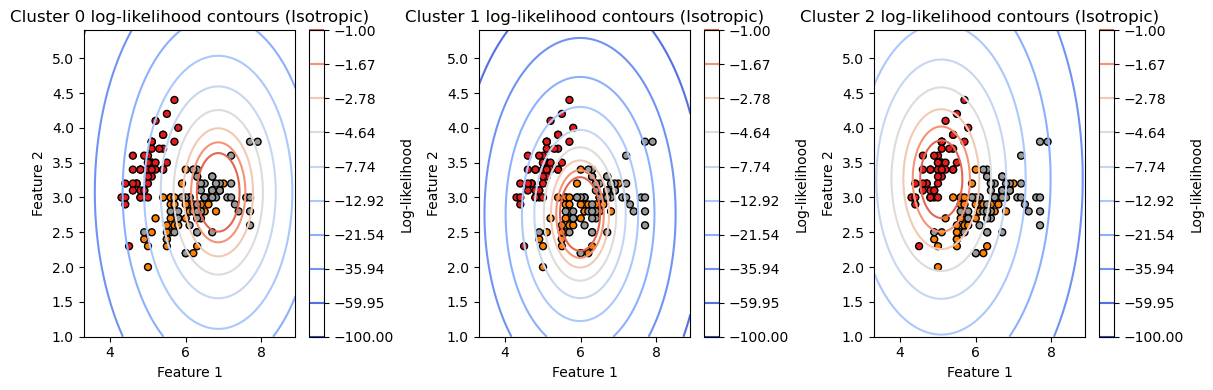

In [24]:
# Fit GMM with isotropic Gaussians (spherical covariance)
gmm_iso = GaussianMixture(n_components=3, covariance_type='spherical', random_state=42)
gmm_iso.fit(X_iris_2d)

# Extract parameters
weights = gmm_iso.weights_
means = gmm_iso.means_
covariances = gmm_iso.covariances_  # For 'spherical', this is (n_components,) array of variances

# Create grid for contour plot
x = np.linspace(X_iris_2d[:, 0].min() - 1, X_iris_2d[:, 0].max() + 1, 300)
y = np.linspace(X_iris_2d[:, 1].min() - 1, X_iris_2d[:, 1].max() + 1, 300)
xx, yy = np.meshgrid(x, y)
grid = np.c_[xx.ravel(), yy.ravel()]

def log_likelihood_isotropic(X, mu, var):
    """
    Compute log-likelihood of isotropic Gaussian for points X
    var: scalar variance
    """
    D = mu.shape[0]
    diff = X - mu
    exponent = np.sum(diff ** 2, axis=1) / var
    norm_const = 1 / np.sqrt((2 * np.pi * var) ** D)
    return np.log(norm_const) - 0.5 * exponent

# Plotting contours for each cluster
plt.figure(figsize=(12, 4))
colormap = plt.cm.Set1

for k in range(gmm_iso.n_components):
    # Compute log-likelihood for cluster k on grid
    zz = log_likelihood_isotropic(grid, means[k], covariances[k])
    zz = zz.reshape(xx.shape)

    plt.subplot(1, 3, k + 1)
    contour = plt.contour(
        xx, yy, zz,
        levels=-np.logspace(0, 2, 10)[::-1],
        norm=SymLogNorm(linthresh=3, linscale=1, vmin=-100, vmax=0),
        cmap=plt.cm.coolwarm
    )
    plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=iris_dataset.target, cmap=colormap, edgecolor='k', s=25)
    plt.title(f'Cluster {k} log-likelihood contours (Isotropic)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(contour, label='Log-likelihood')

plt.tight_layout()
plt.show()

**Compare decision boundary with KMeans. Would it be possible to obtain similar decision boundaries with a Gaussian Mixture Model? If yes, how?**

Only answer what should be done "in theory", you do not need to do it in practice. If you really insist on doing this question in practice (and again, you do **not** need to do that to answer the question), you should have a look at the "precisions_cholesky_" attribute, which is used in the "predict" method of the GMM.

Yes, GMM can approximate KMeans decision boundaries under certain conditions:
If all Gaussian components share:
Equal covariance matrices, specifically isotropic (spherical) covariances with equal variance,
And the covariance is very small (clusters tightly concentrated around centroids),
Then the GMM’s posterior assignment essentially becomes a nearest-centroid assignment (similar to KMeans).
This is because:
With equal and spherical covariance, likelihood depends mainly on the distance from the mean (centroid),
So, the GMM decision boundary reduces to the set of points equidistant from two centroids, i.e., the Voronoi boundary, just like KMeans.

## 4D GMM

Now let us consider the 4D initial dataset again.

**Fit a GMM similarly to the first question**

In [26]:


# Fit Gaussian Mixture Model with 3 clusters on full 4D data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_iris)

# Print means and covariances of the clusters
print("Cluster means:\n", gmm.means_)
print("\nCluster covariances:\n", gmm.covariances_)

# Predict cluster labels
gmm_labels = gmm.predict(X_iris)

# Optional: Evaluate clustering accuracy (not perfect since it's unsupervised)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_iris, gmm_labels)
print(f"\nAdjusted Rand Index (ARI) against true labels: {ari:.3f}")

Cluster means:
 [[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]

Cluster covariances:
 [[[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]

 [[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]]

Adjusted Rand Index (ARI) against true labels: 0.904


C:\Users\usbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Show the result, and display the probabilistic assignments of each sample using colors**

(plot only the first 2 dimensions)

C:\Users\usbal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


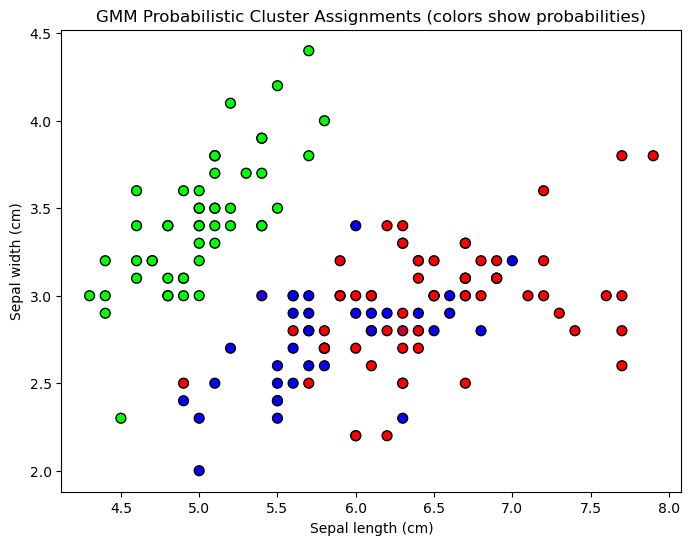

In [27]:
# Fit GMM on full 4D data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_iris)

# Get probabilistic cluster assignments (responsibilities), shape (150, 3)
probs = gmm.predict_proba(X_iris)

# Plot using first two dimensions of X_iris
plt.figure(figsize=(8,6))

# For each sample, color by weighted average of cluster colors according to responsibilities
colors = np.array([
    [1, 0, 0],  # Red for cluster 0
    [0, 1, 0],  # Green for cluster 1
    [0, 0, 1]   # Blue for cluster 2
])

# Compute mixed colors based on responsibilities
mixed_colors = np.dot(probs, colors)

plt.scatter(X_iris[:, 0], X_iris[:, 1], color=mixed_colors, edgecolor='k', s=50)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('GMM Probabilistic Cluster Assignments (colors show probabilities)')
plt.show()

**Is there any difference with the probabilities fitted with 2 dimensions only? Why?**

Fitting on full data = richer information = more reliable cluster probabilities.
Fitting on reduced data = loss of information = less precise probabilities.

Since we know (an estimation of) the distribution of the data, we can also use it to generate/sample new data points.

**Generate some new points, and plot the result. Does it look consistent?**

(plot only the first 2 dimensions)